In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
df =  pd.read_csv("/home/jerome/Documents/CSV FILE/bots_vs_users.csv")

In [62]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Moscow,1.0,0.0,1.0,Unknown


In [63]:
df.duplicated().sum()

np.int64(2616)

In [64]:
df.drop_duplicates(inplace= True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3258 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  3258 non-null   object 
 1   has_birth_date              3258 non-null   object 
 2   has_photo                   3258 non-null   object 
 3   can_post_on_wall            3258 non-null   object 
 4   can_send_message            3258 non-null   object 
 5   has_website                 3258 non-null   object 
 6   gender                      3258 non-null   object 
 7   has_short_name              3258 non-null   object 
 8   has_first_name              3258 non-null   object 
 9   has_last_name               3258 non-null   object 
 10  access_to_closed_profile    3258 non-null   object 
 11  is_profile_closed           3258 non-null   object 
 12  target                      3258 non-null   int64  
 13  has_nickname                3258 non-n

In [66]:
df.columns

Index(['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall',
       'can_send_message', 'has_website', 'gender', 'has_short_name',
       'has_first_name', 'has_last_name', 'access_to_closed_profile',
       'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name',
       'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music', 'can_add_as_friend',
       'can_invite_to_group', 'subscribers_count', 'is_blacklisted',
       'has_career', 'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbe

In [67]:
df.drop(['has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music','subscribers_count', 'is_blacklisted','has_career', 'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbers_ratio',
       'avg_text_uniqueness', 'city', 'has_occupation',
       'occupation_type_university', 'occupation_type_work',
       'has_personal_data'], axis = 1, inplace= True)

In [68]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,target,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,can_add_as_friend,can_invite_to_group
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
27,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0
53,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0
82,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
84,1.0,Unknown,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,0.0,1.0,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [69]:
df.isna().sum()

has_domain                  0
has_birth_date              0
has_photo                   0
can_post_on_wall            0
can_send_message            0
has_website                 0
gender                      0
has_short_name              0
has_first_name              0
has_last_name               0
access_to_closed_profile    0
is_profile_closed           0
target                      0
has_nickname                0
has_maiden_name             0
has_mobile                  0
all_posts_visible           0
audio_available             0
can_add_as_friend           0
can_invite_to_group         0
dtype: int64

In [70]:
for x in df.columns:
    df[x] = df[x].replace('Unknown', np.nan)

In [71]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

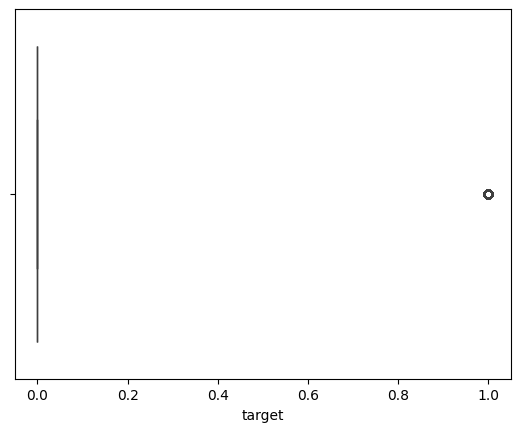

In [72]:
num = df.select_dtypes("number")
cat = df.select_dtypes("object")
for x in num:
    sns.boxplot(x = num[x])
    plt.show()

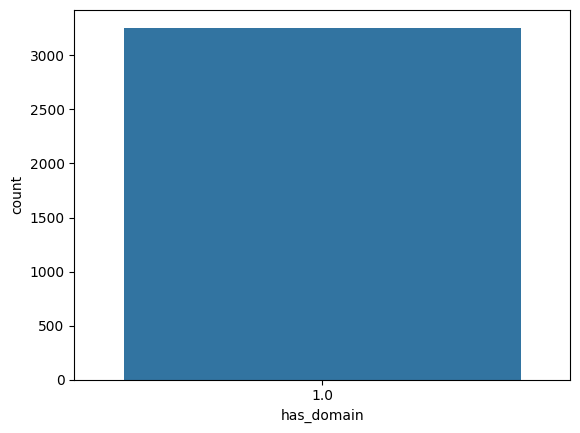

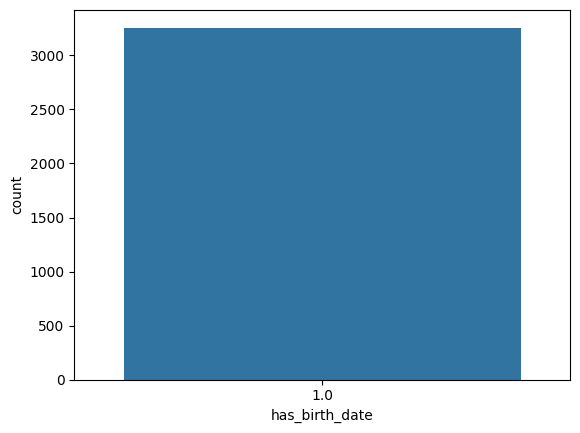

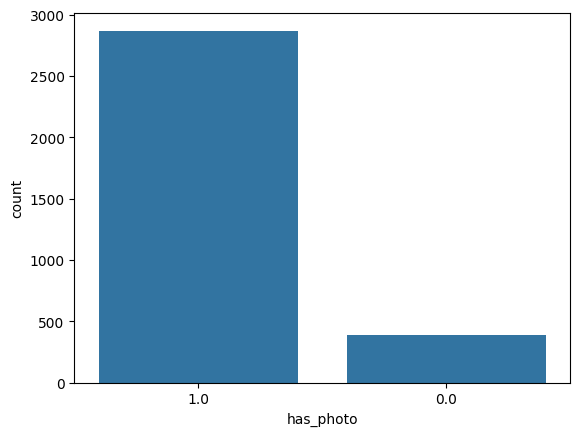

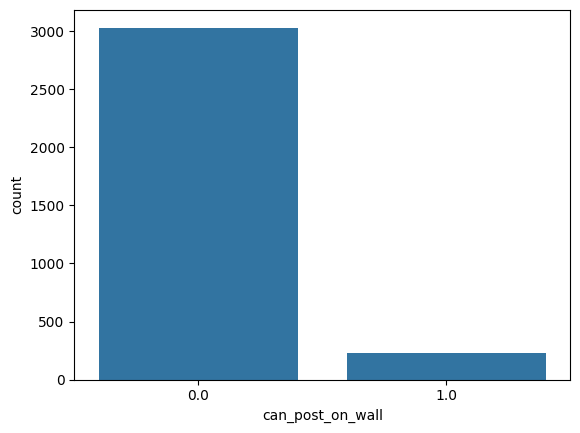

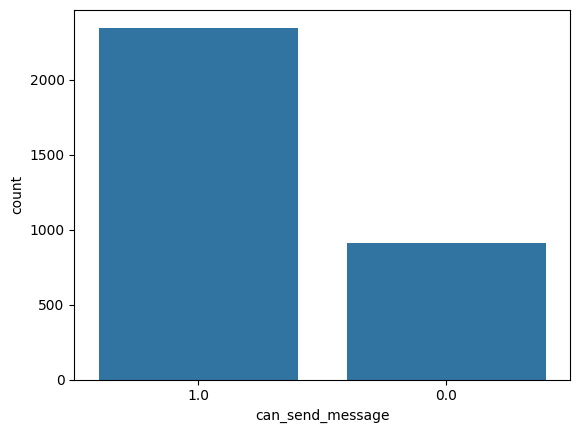

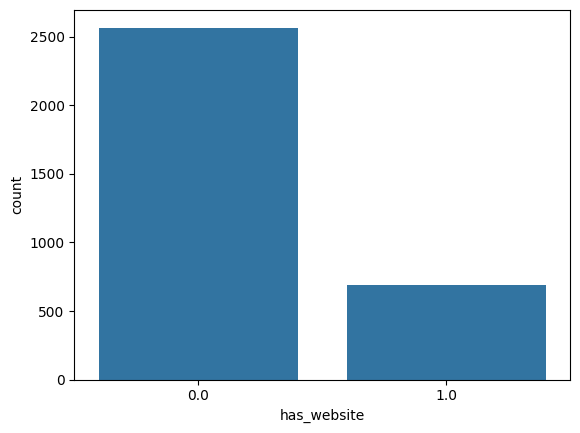

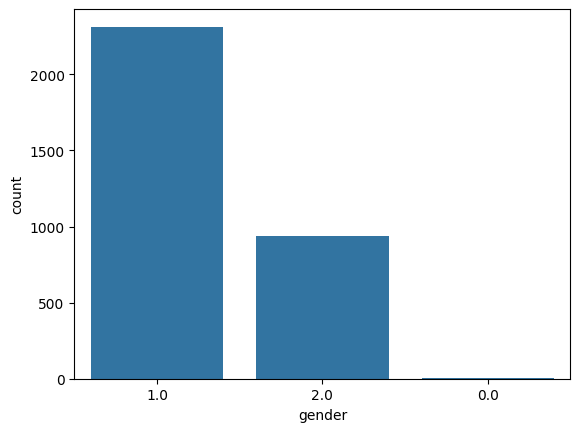

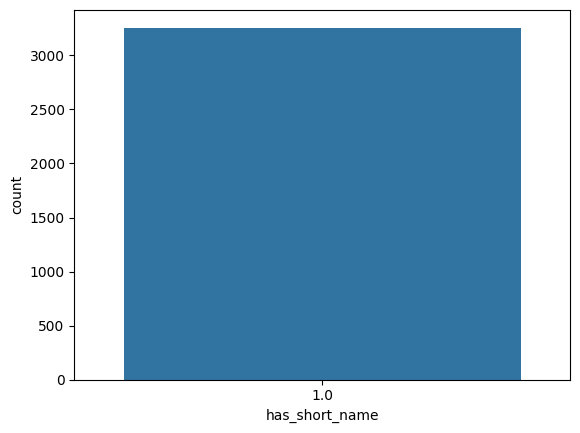

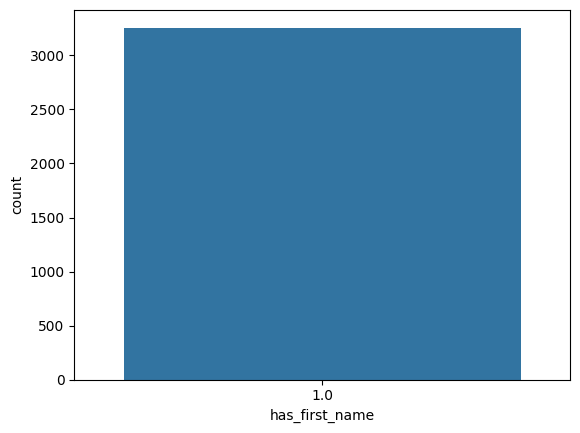

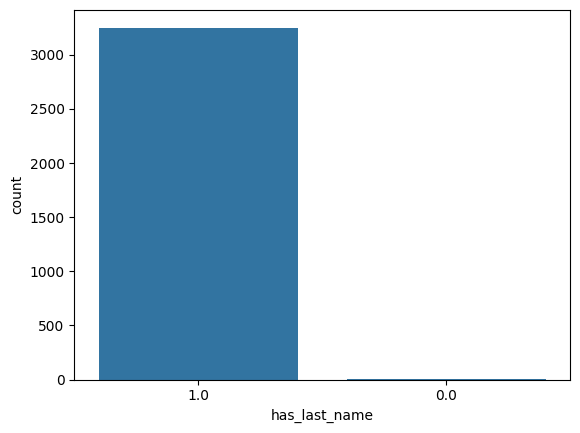

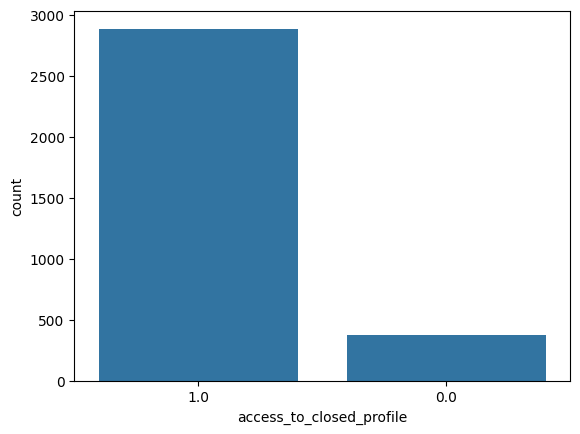

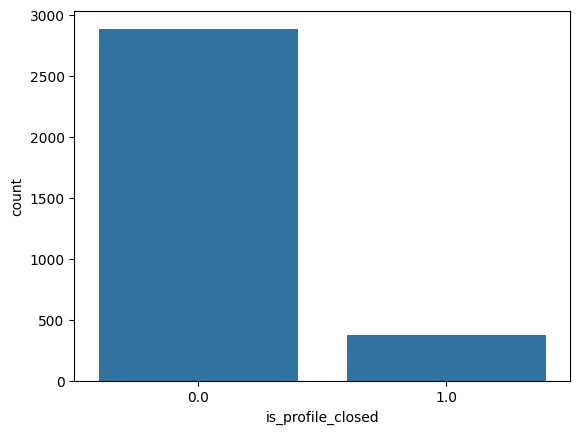

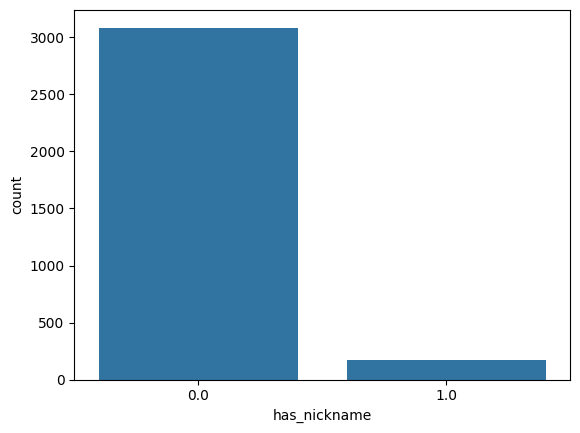

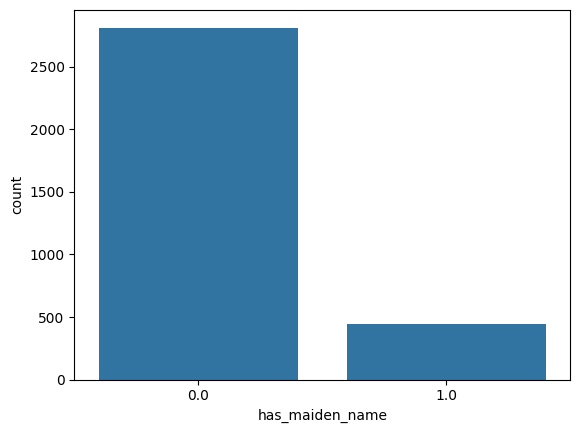

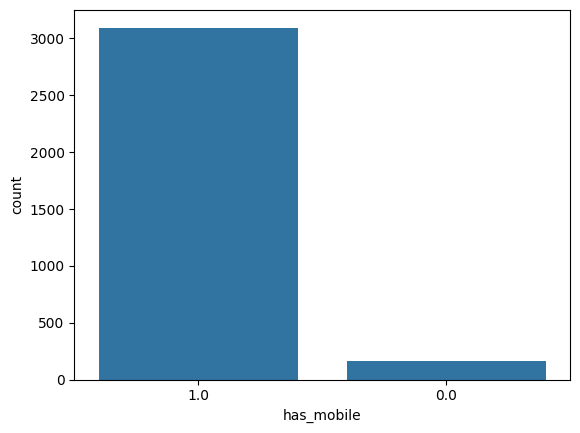

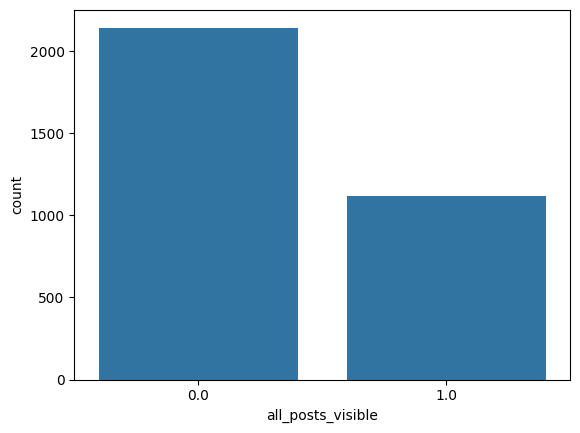

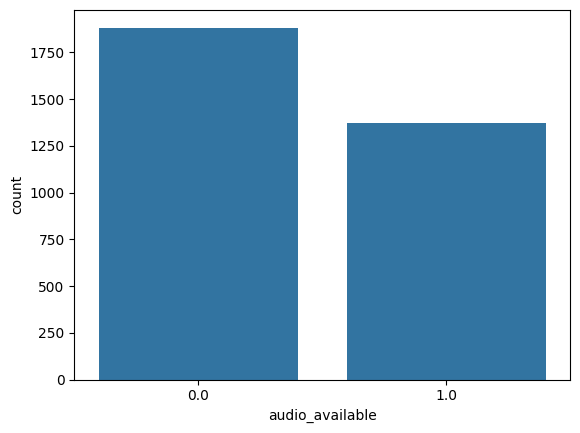

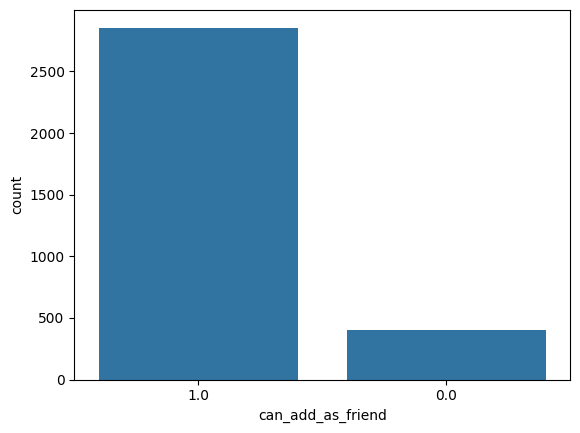

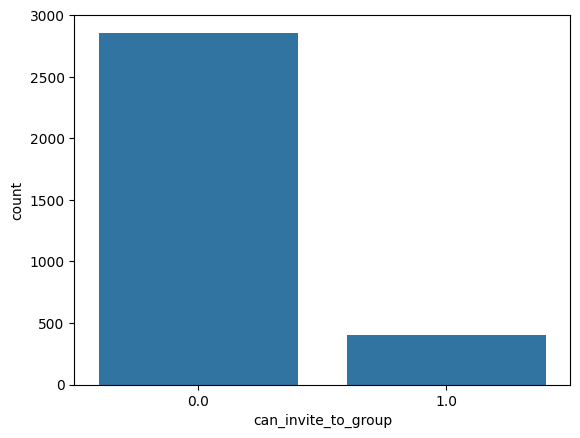

In [73]:
for y in cat.columns:
    sns.barplot(cat[y].value_counts())
    plt.show()

In [76]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,access_to_closed_profile,is_profile_closed,target,has_nickname,has_maiden_name,has_mobile,all_posts_visible,audio_available,can_add_as_friend,can_invite_to_group
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0
53,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0
82,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5870,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [81]:
le = LabelEncoder()
for y in cat:
    df[y] = le.fit_transform(df[y])

In [82]:
X =  df.drop(columns="target")
y = df["target"]

In [78]:
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state= 42, test_size= 0.2)

In [85]:
smote = SMOTE(sampling_strategy = 'minority')
X_resample,y_resample = smote.fit_resample(X_train,y_train)

In [86]:
%%time
model = SVC(kernel= "linear")
model.fit(X_resample,y_resample)

CPU times: user 727 ms, sys: 28.4 ms, total: 755 ms
Wall time: 1.06 s


SVC(kernel='linear')

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       477
           1       0.68      0.82      0.74       175

    accuracy                           0.85       652
   macro avg       0.80      0.84      0.82       652
weighted avg       0.86      0.85      0.85       652

